In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import random
from cnn_forward import *

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [50]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [51]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [52]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [53]:
x_train.shape

(45000, 32, 32, 3)

### Pengaruh Jumlah Layer Konvolusi

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model A (1 Layer Konvolusi) ---")
model_A = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_A.summary()

model_A.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model A (1 Layer Konvolusi) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model B (2 Layer Konvolusi) ---")
model_B = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(32, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_B.summary()
model_B.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model B (2 Layer Konvolusi) ---


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,018 (621.16 KB)

 Trainable params: 159,018 (621.16 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model C (3 Layer Konvolusi) ---")
model_C = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(32, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(32, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_C.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_C.summary()

--- Arsitektur Model C (3 Layer Konvolusi) ---


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,194 (145.29 KB)

 Trainable params: 37,194 (145.29 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_A_hist = model_A.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3474 - loss: 1.7996 - val_accuracy: 0.5226 - val_loss: 1.3354
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5044 - loss: 1.3879 - val_accuracy: 0.5594 - val_loss: 1.2373
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5426 - loss: 1.2824 - val_accuracy: 0.5970 - val_loss: 1.1451
Epoch 4/10
561/704 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5707 - loss: 1.2080

KeyboardInterrupt: 

In [ ]:
model_B_hist = model_B.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2983 - loss: 1.8947 - val_accuracy: 0.5130 - val_loss: 1.3568
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4843 - loss: 1.4342 - val_accuracy: 0.5734 - val_loss: 1.1901
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5405 - loss: 1.2847 - val_accuracy: 0.6014 - val_loss: 1.1073
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5792 - loss: 1.1875 - val_accuracy: 0.6266 - val_loss: 1.0496
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6019 - loss: 1.1238 - val_accuracy: 0.6438 - val_loss: 1.0122
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6202 - loss: 1.0751 - val_accuracy: 0.6494 - val_loss: 0.9876
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6372 - loss: 1.0279 - val_accuracy: 0.6460 - val_loss: 0.9850
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6492 - loss: 0.9990 - val_accuracy: 0.

In [ ]:
model_C_hist = model_C.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2443 - loss: 2.0005 - val_accuracy: 0.4590 - val_loss: 1.4600
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4550 - loss: 1.5030 - val_accuracy: 0.5292 - val_loss: 1.2943
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5128 - loss: 1.3495 - val_accuracy: 0.5604 - val_loss: 1.2049
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5536 - loss: 1.2491 - val_accuracy: 0.5862 - val_loss: 1.1494
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5775 - loss: 1.1831 - val_accuracy: 0.6076 - val_loss: 1.0900
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6014 - loss: 1.1242 - val_accuracy: 0.6146 - val_loss: 1.0813
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6175 - loss: 1.0833 - val_accuracy: 0.6314 - val_loss: 1.0341
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6273 - loss: 1.0517 - val_accuracy: 0.

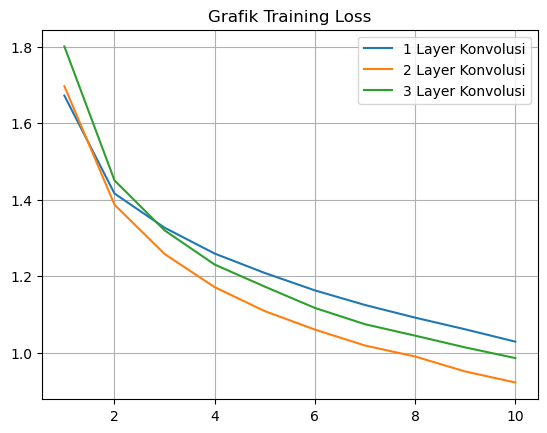

In [ ]:
plt.plot(range(1,11),model_A_hist.history['loss'], label = '1 Layer Konvolusi')
plt.plot(range(1,11), model_B_hist.history['loss'], label = '2 Layer Konvolusi')
plt.plot(range(1,11), model_C_hist.history['loss'], label = '3 Layer Konvolusi')
plt.legend()
plt.title('Grafik Training Loss')
plt.grid(True)
plt.show()

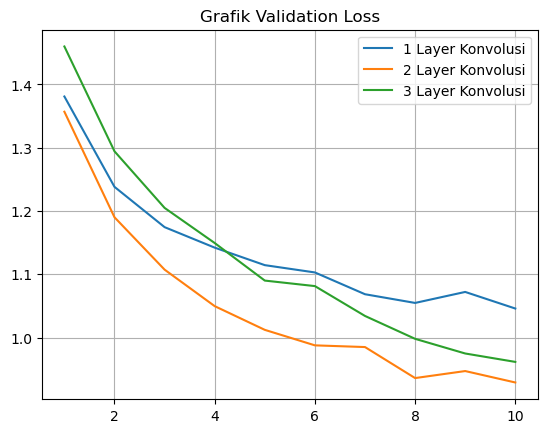

In [ ]:
plt.plot(range(1,11),model_A_hist.history['val_loss'], label = '1 Layer Konvolusi')
plt.plot(range(1,11), model_B_hist.history['val_loss'], label = '2 Layer Konvolusi')
plt.plot(range(1,11), model_C_hist.history['val_loss'], label = '3 Layer Konvolusi')
plt.legend()
plt.title('Grafik Validation Loss')
plt.grid(True)
plt.show()

In [ ]:
y_pred_A = np.argmax(model_A.predict(x_test), axis=1)
y_pred_B = np.argmax(model_B.predict(x_test), axis=1)
y_pred_C = np.argmax(model_C.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_A = f1_score(y_test, y_pred_A, average='macro')
print("F1 Score (Macro) 1 Layer Konvolusi:", f1_A)

f1_B = f1_score(y_test, y_pred_B, average='macro')
print("F1 Score (Macro) 2 Layer Konvolusi:", f1_B)

f1_C = f1_score(y_test, y_pred_C, average='macro')
print("F1 Score (Macro) 3 Layer Konvolusi:", f1_C)

F1 Score (Macro) 1 Layer Konvolusi: 0.6384111540205678
F1 Score (Macro) 2 Layer Konvolusi: 0.6818174510633892
F1 Score (Macro) 3 Layer Konvolusi: 0.6550895746647745


### Pengaruh Banyak Filter per Layer Konvolusi

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model D (64 Filter) ---")
model_D = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_D.summary()
model_D.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model D (64 Filter) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,050 (1.28 MB)

 Trainable params: 335,050 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model E (128 Filter) ---")
model_E = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(128, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_E.summary()
model_E.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model E (128 Filter) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 742,410 (2.83 MB)

 Trainable params: 742,410 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model F (256 Filter) ---")
model_F = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(256, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_F.summary()
model_F.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model F (256 Filter) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 30, 30, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,778,314 (6.78 MB)

 Trainable params: 1,778,314 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model_D_hist = model_D.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_E_hist = model_E.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_F_hist = model_F.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3190 - loss: 1.8488 - val_accuracy: 0.5340 - val_loss: 1.2955
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5050 - loss: 1.3734 - val_accuracy: 0.5954 - val_loss: 1.1619
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5650 - loss: 1.2279 - val_accuracy: 0.6218 - val_loss: 1.0745
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6011 - loss: 1.1337 - val_accuracy: 0.6640 - val_loss: 0.9723
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6236 - loss: 1.0647 - val_accuracy: 0.6532 - val_loss: 1.0173
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6457 - loss: 1.0076 - val_accuracy: 0.6820 - val_loss: 0.9215
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6587 - loss: 0.9663 - val_accuracy: 0.6804 - val_loss: 0.9254
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6752 - loss: 0.9224 - va

In [58]:
y_pred_D = np.argmax(model_D.predict(x_test), axis=1)
y_pred_E = np.argmax(model_E.predict(x_test), axis=1)
y_pred_F = np.argmax(model_F.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [ ]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_D = f1_score(y_test, y_pred_D, average='macro')
print("F1 Score (Macro) 64 Filter:", f1_D)

f1_E = f1_score(y_test, y_pred_E, average='macro')
print("F1 Score (Macro) 128 Filter:", f1_E)

f1_F = f1_score(y_test, y_pred_F, average='macro')
print("F1 Score (Macro) 256 Filter:", f1_F)

F1 Score (Macro) 1 Layer Konvolusi: 0.6384111540205678
F1 Score (Macro) 2 Layer Konvolusi: 0.6818174510633892
F1 Score (Macro) 3 Layer Konvolusi: 0.6550895746647745


### Pengaruh Ukuran Filter

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model G (2 * 2) ---")
model_G = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (2, 2), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(64, (2, 2), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_G.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_G.summary()

--- Arsitektur Model G (2 * 2) ---


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 31, 31, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 6, 6, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,874 (425.29 KB)

 Trainable params: 108,874 (425.29 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model H (3* 3) ---")
model_H = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(64, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_H.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_H.summary()

--- Arsitektur Model H (3* 3) ---


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,834 (429.04 KB)

 Trainable params: 109,834 (429.04 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model I (4 * 4) ---")
model_I = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (4, 4), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (4, 4), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(64, (4, 4), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_I.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_I.summary()

--- Arsitektur Model I (4 * 4) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 11, 11, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 2, 2, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,946 (562.29 KB)

 Trainable params: 143,946 (562.29 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model_G_hist = model_G.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_H_hist = model_H.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_I_hist = model_I.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7011 - loss: 0.8512 - val_accuracy: 0.7144 - val_loss: 0.8084
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7112 - loss: 0.8200 - val_accuracy: 0.7192 - val_loss: 0.8061
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7160 - loss: 0.7995 - val_accuracy: 0.7222 - val_loss: 0.7935
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7292 - loss: 0.7767 - val_accuracy: 0.7218 - val_loss: 0.7989
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7355 - loss: 0.7573 - val_accuracy: 0.7260 - val_loss: 0.7808
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7374 - loss: 0.7439 - val_accuracy: 0.7134 - val_loss: 0.8212
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7404 - loss: 0.7316 - val_accuracy: 0.7276 - val_loss: 0.7786
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7461 - loss: 0.7166 - val_accu

In [69]:
y_pred_G = np.argmax(model_G.predict(x_test), axis=1)
y_pred_H = np.argmax(model_H.predict(x_test), axis=1)
y_pred_I = np.argmax(model_I.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [70]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_G = f1_score(y_test, y_pred_G, average='macro')
print("F1 Score (Macro) 64 Filter:", f1_G)

f1_H = f1_score(y_test, y_pred_H, average='macro')
print("F1 Score (Macro) 128 Filter:", f1_H)

f1_I = f1_score(y_test, y_pred_I, average='macro')
print("F1 Score (Macro) 256 Filter:", f1_I)

F1 Score (Macro) 64 Filter: 0.7078450929303093
F1 Score (Macro) 128 Filter: 0.7093725273346234
F1 Score (Macro) 256 Filter: 0.6456186029414334


In [ ]:
##

### Pengaruh Jenis Pooling Layer

In [73]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model J (Max Pooling) ---")
model_J = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(128, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(256, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_J.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_J.summary()

--- Arsitektur Model J (Max Pooling) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,306 (1.92 MB)

 Trainable params: 503,306 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model K (Average Pooling) ---")
model_K = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(128, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.AveragePooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(256, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.AveragePooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_K.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_K.summary()

--- Arsitektur Model K (Average Pooling) ---


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 15, 15, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 6, 6, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 2, 2, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,306 (1.92 MB)

 Trainable params: 503,306 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model_J_hist = model_J.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_K_hist = model_K.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.2801 - loss: 1.9255 - val_accuracy: 0.5354 - val_loss: 1.2663
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5090 - loss: 1.3636 - val_accuracy: 0.6080 - val_loss: 1.0825
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5921 - loss: 1.1556 - val_accuracy: 0.6590 - val_loss: 0.9647
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6420 - loss: 1.0200 - val_accuracy: 0.6702 - val_loss: 0.9198
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6816 - loss: 0.9224 - val_accuracy: 0.6938 - val_loss: 0.8783
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7093 - loss: 0.8342 - val_accuracy: 0.7066 - val_loss: 0.8345
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7346 - loss: 0.7617 - val_accuracy: 0.7102 - val_loss: 0.8254
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7550 - loss: 0.7119 - 

In [76]:
y_pred_J = np.argmax(model_J.predict(x_test), axis=1)
y_pred_K = np.argmax(model_K.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [79]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_J = f1_score(y_test, y_pred_J, average='macro')
print("F1 Score (Macro) Max Pooling:", f1_J)

f1_K = f1_score(y_test, y_pred_K, average='macro')
print("F1 Score (Macro) Average Pooling:", f1_K)


F1 Score (Macro) Max Pooling: 0.7167792557924956
F1 Score (Macro) Average Pooling: 0.6928677323500485
